In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import PIL
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_height,img_width = (224,224)
batch_size = 32
train_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_style\\test_resnet\\output_style\\train"
valid_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_style\\test_resnet\\output_style\\val"
test_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_style\\test_resnet\\output_style\\test"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

valid_generator=train_datagen.flow_from_directory(
    valid_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 1956 images belonging to 10 classes.
Found 68 images belonging to 10 classes.


In [4]:
test_generator=train_datagen.flow_from_directory(
    test_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 73 images belonging to 10 classes.


In [5]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [6]:
base_model = ResNet50(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

for layer in base_model.layers:
    layer.trainable=False
    
    
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)

x = Dense(64,activation='relu')(x)
                     
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs=base_model.input ,outputs=predictions)


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [8]:
    
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])
model.fit(train_generator,
                         epochs = 100)

Epoch 1/100
62/62 [==============================] - 122s 2s/step - loss: 1.6884 - accuracy: 0.4075
Epoch 2/100
62/62 [==============================] - 98s 2s/step - loss: 1.3471 - accuracy: 0.5036
Epoch 3/100
62/62 [==============================] - 101s 2s/step - loss: 1.1965 - accuracy: 0.5787
Epoch 4/100
62/62 [==============================] - 98s 2s/step - loss: 1.1121 - accuracy: 0.6115
Epoch 5/100
62/62 [==============================] - 96s 2s/step - loss: 1.0027 - accuracy: 0.6478
Epoch 6/100
62/62 [==============================] - 98s 2s/step - loss: 0.9226 - accuracy: 0.6544
Epoch 7/100
62/62 [==============================] - 100s 2s/step - loss: 0.9290 - accuracy: 0.6713
Epoch 8/100
62/62 [==============================] - 100s 2s/step - loss: 0.8454 - accuracy: 0.6953
Epoch 9/100
62/62 [==============================] - 100s 2s/step - loss: 0.7192 - accuracy: 0.7270
Epoch 10/100
62/62 [==============================] - 94s 2s/step - loss: 0.7240 - accuracy: 0.7326
Epoc

In [9]:
model.save('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_style\\save_test\\ResNet550_style.h5' )

In [10]:
test_loss,test_acc = model.evaluate(test_generator, verbose=2)
print('\ntest accuracy:' , test_acc)

73/73 - 7s - loss: 3.3106 - accuracy: 0.6027 - 7s/epoch - 91ms/step

test accuracy: 0.6027397513389587


1/1 [==============================] - 0s 24ms/step


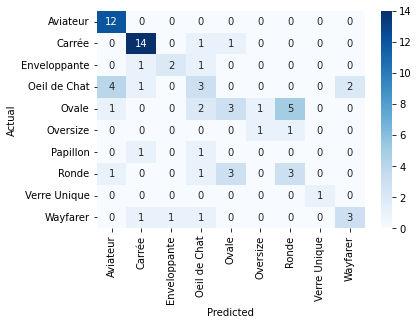

test accuracy:47.94520547945205


In [11]:
model = tf.keras.models.load_model("C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_style\\save_test\\ResNet550_style.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))